In [162]:
import scanpy as sc 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np
import pandas as pd 
import anndata as an

sc.settings.set_figure_params(scanpy=True, vector_friendly=True, fontsize=14, figsize=(9, 6), dpi_save=500)

We'll visualize the datasets with UMAP for some pretty plots in the paper. Let's begin with 

### Allen Brain Institute, Human cortical data

In [173]:
human = an.read_h5ad('../data/benchmark/human.h5ad')
human_labels = pd.read_csv('../data/benchmark/human_labels_clean.csv')

human = human[human_labels['cell'].values, :]
human.obs = human.obs.reset_index() # Since we selected human_labels['cell']
human.obs['class'] = human_labels['categorical_subclass_label']

# Calculate PCA for UMAP
sc.tl.pca(human, svd_solver='arpack')

# Neighborhood embedding + umap
sc.pp.neighbors(human, n_pcs=50)
sc.tl.umap(human)

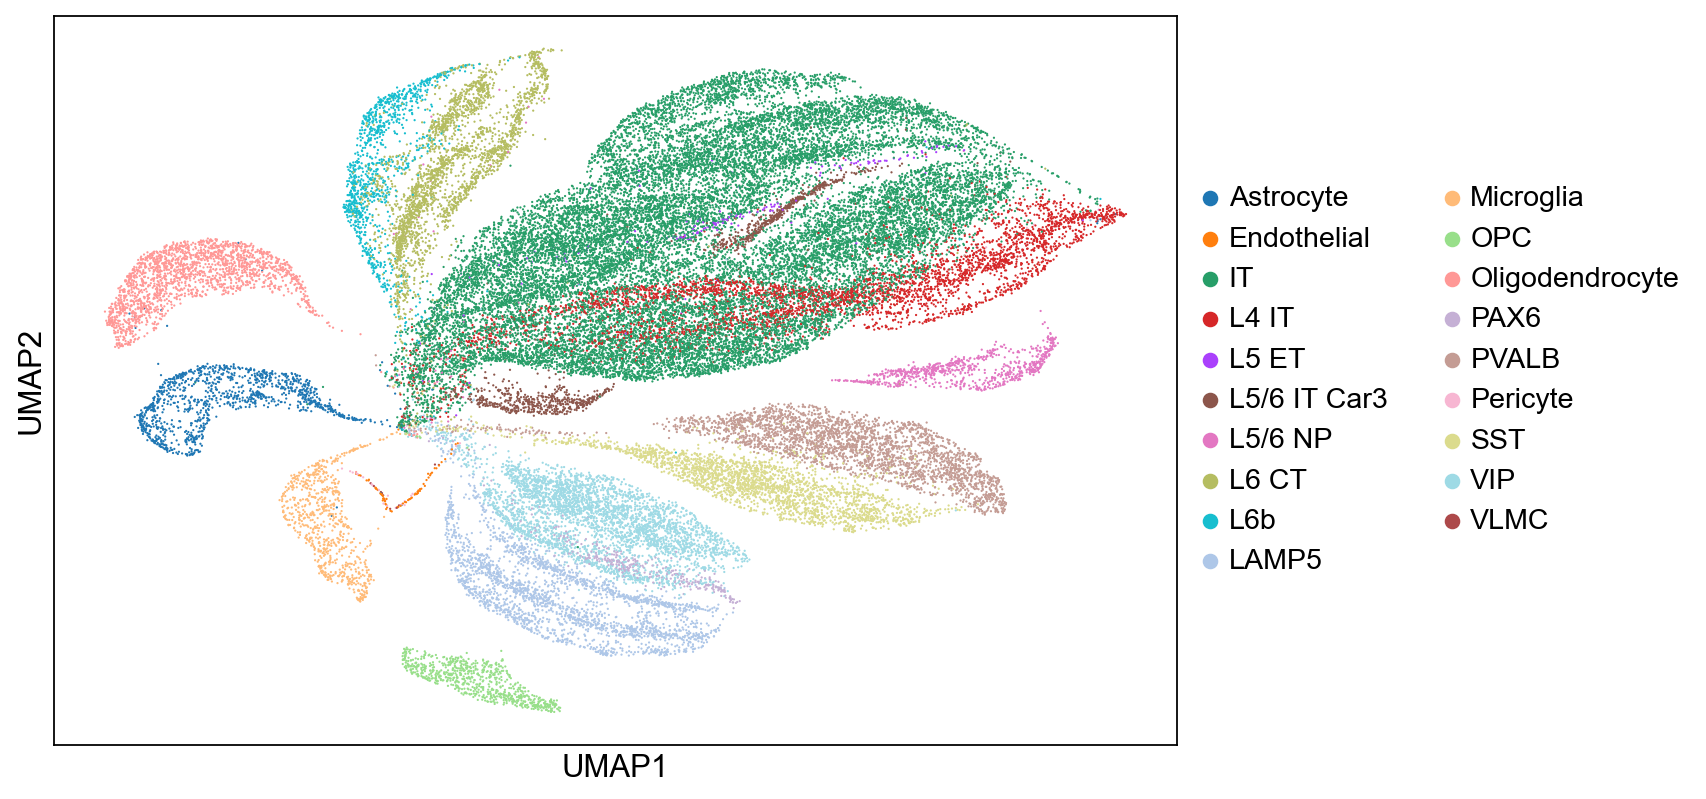

In [172]:
human.obs['class'] = human_labels['categorical_subclass_label']
human.obs['main_class'] = human_labels['class_label']

sc.pl.umap(human, color='class', save='_allen_human.pdf', size=4, title='')

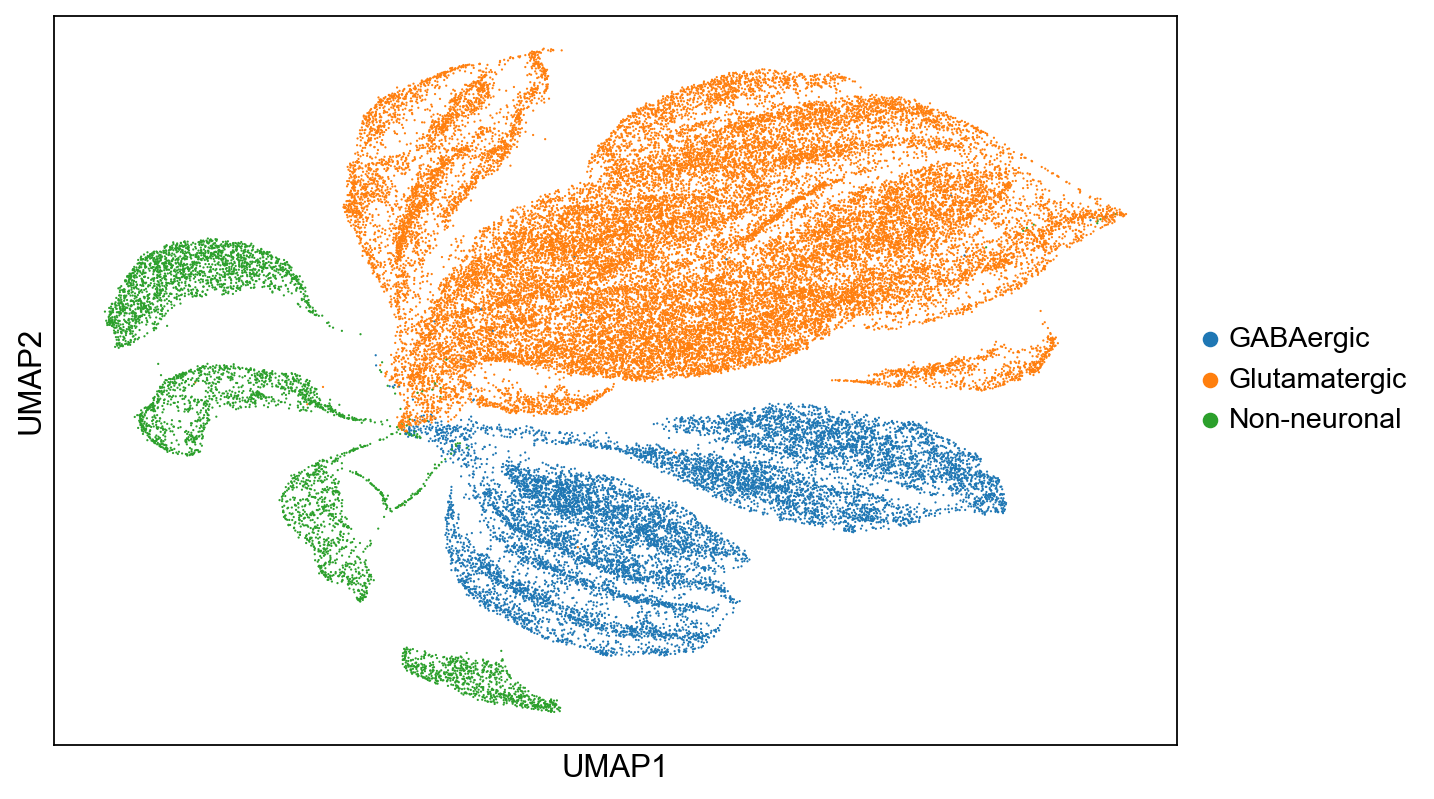

In [171]:
sc.pl.umap(human, color='main_class', save='_allen_human_shallowclass.pdf', size=4, title='')

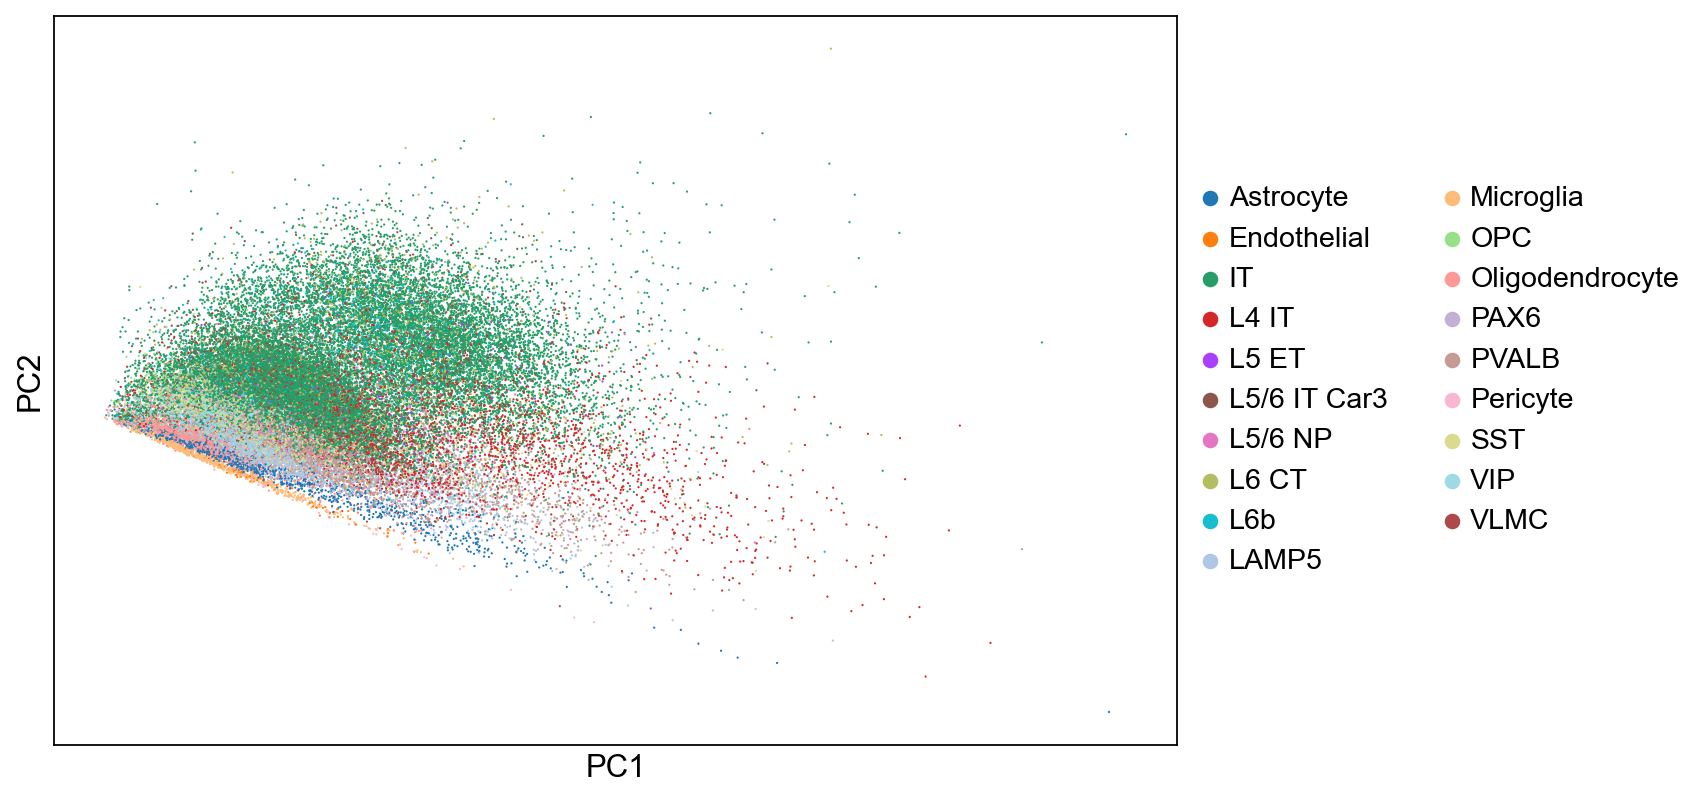

In [188]:
sc.pl.pca(human, color='class', title='', size=4, save='_allen_pca.pdf')

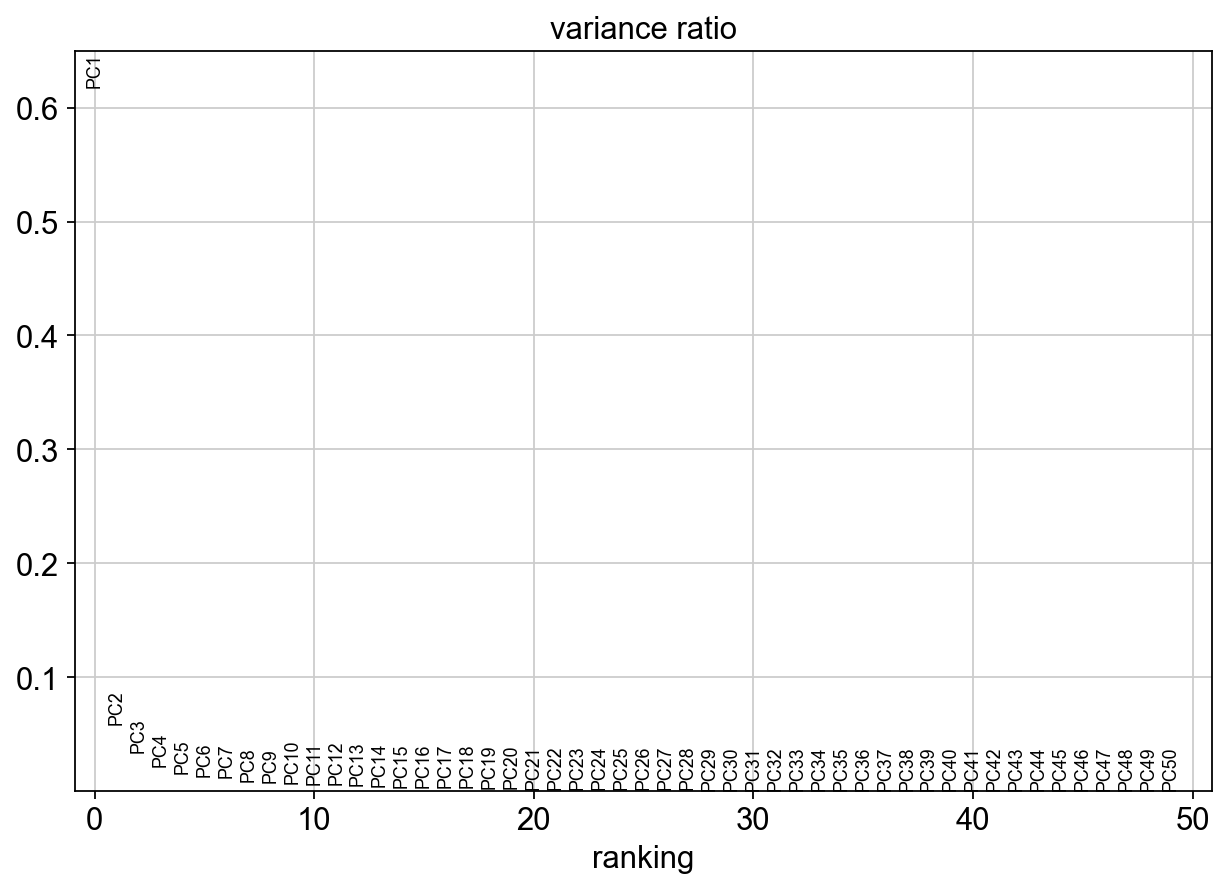

In [189]:
sc.pl.pca_variance_ratio(human, n_pcs=50, save='_allen_pca_variance.pdf')

We can re-use mostly the same code for the 

### Allen Brain Insitute mouse cortical data

/var/folders/pd/jsjcl0fn7w57s5mfr34b20pm0000gn/T/ipykernel_57957/585469.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  mouse_labels = pd.read_csv('../data/benchmark/mouse_labels_clean.csv')


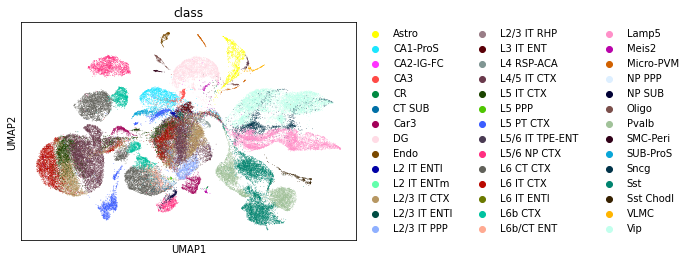

In [50]:
mouse = an.read_h5ad('../data/benchmark/mouse_clipped.h5ad')
mouse_labels = pd.read_csv('../data/benchmark/mouse_labels_clean.csv')

mouse = mouse[mouse_labels['cell'].values, :]
mouse.obs = mouse.obs.reset_index() # Since we selected human_labels['cell']
mouse.obs['class'] = mouse_labels['categorical_subclass_label']

# Calculate PCA for UMAP
sc.tl.pca(mouse, svd_solver='arpack')

# Neighborhood embedding + umap
sc.pp.neighbors(mouse, n_pcs=50)
sc.tl.umap(mouse)



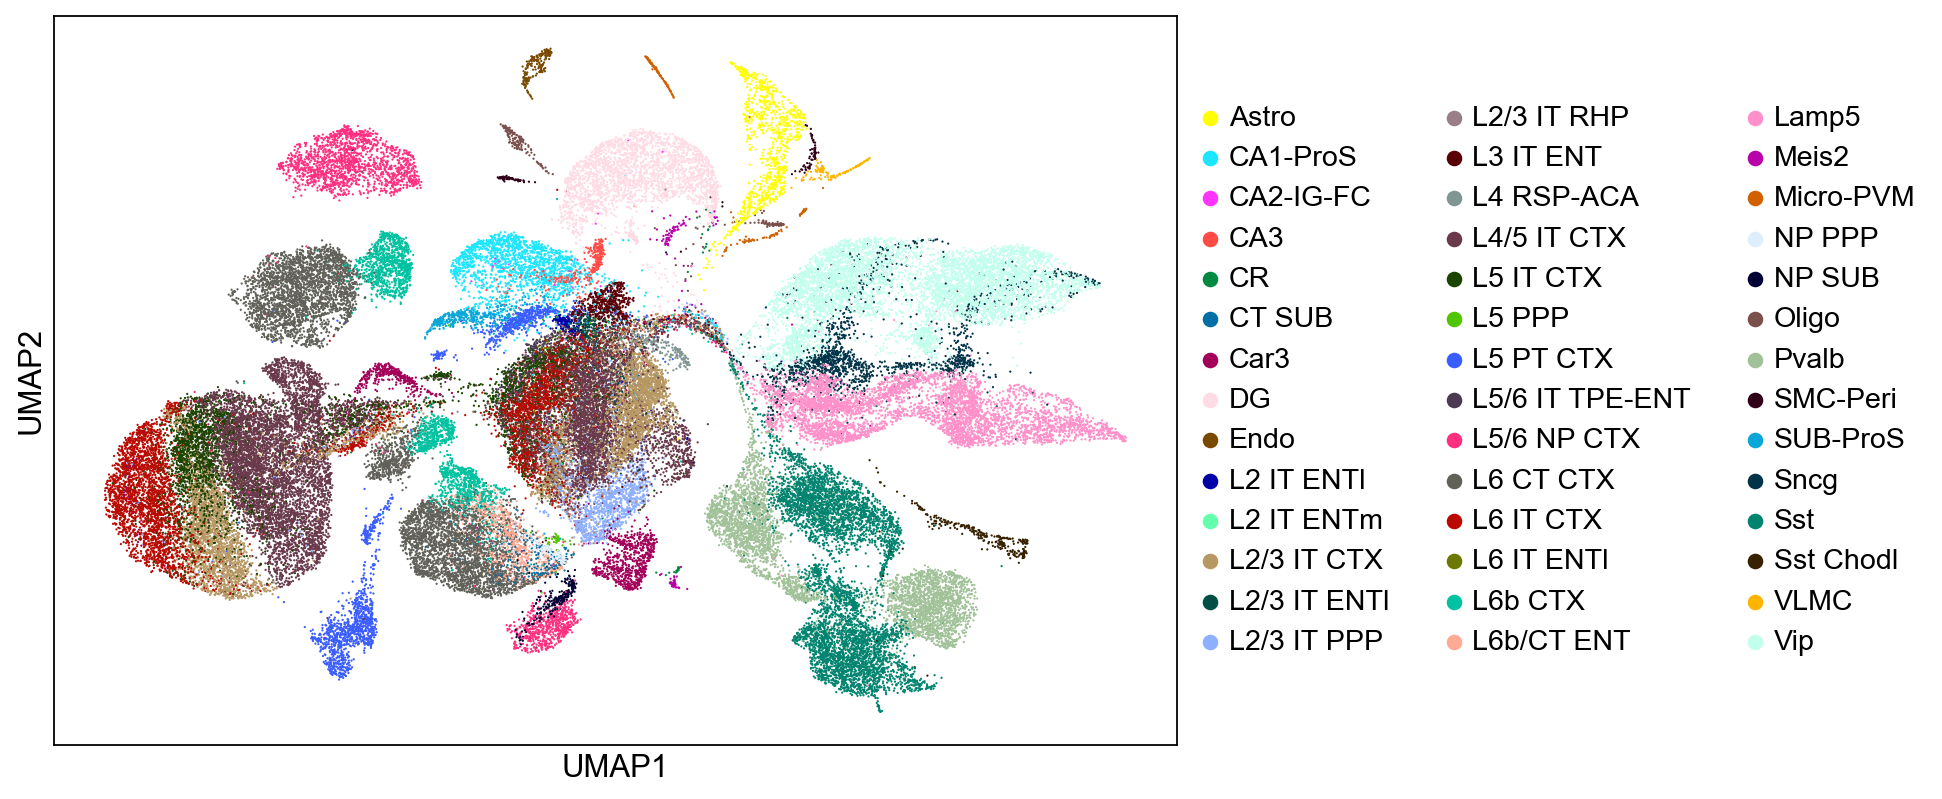

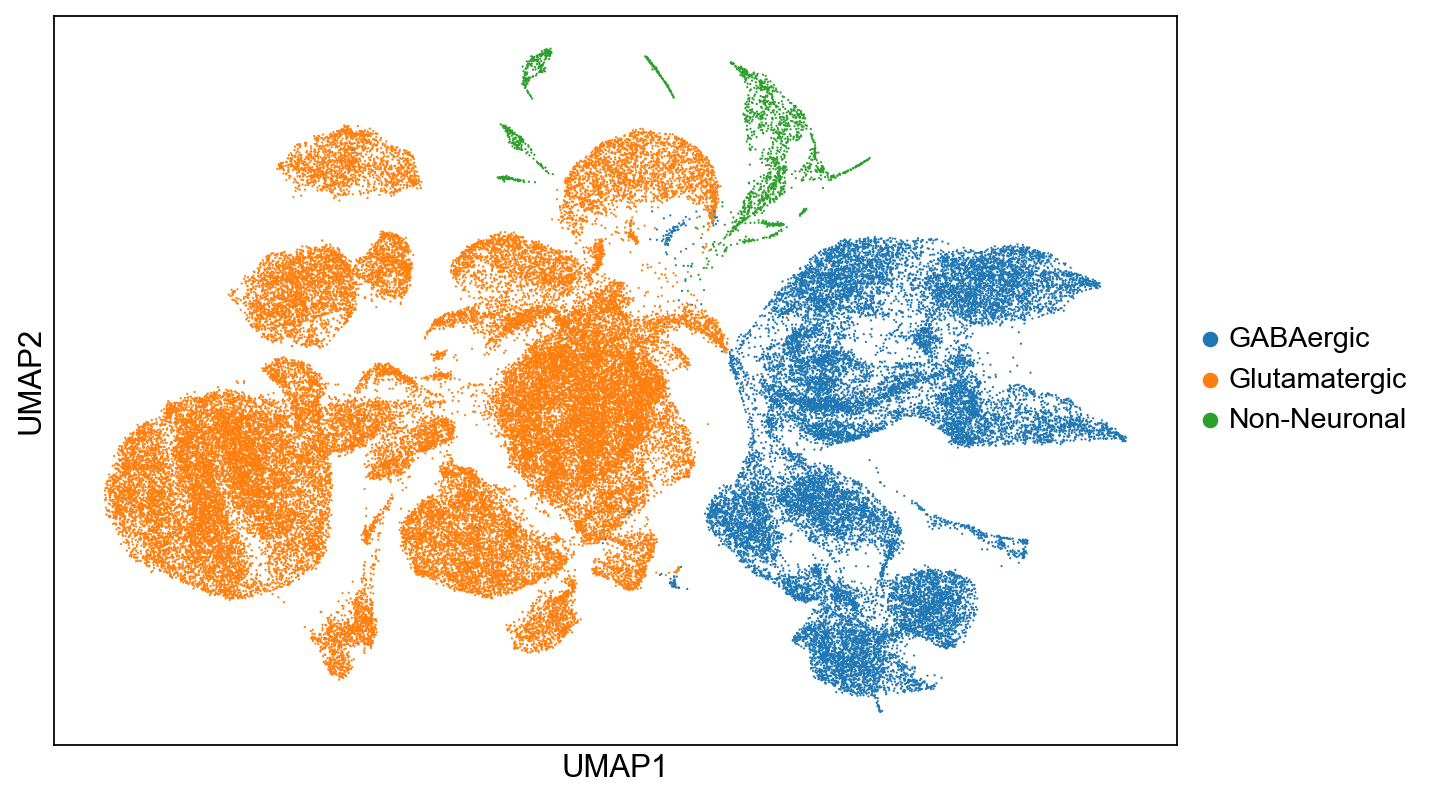

In [170]:
mouse.obs['main_class'] = mouse_labels['class_label']
mouse.obs['region_label'] = mouse_labels['region_label']

# Visualization
sc.pl.umap(mouse, color='class', save='_allen_mouse.pdf', title='', size=4)

sc.pl.umap(mouse, color='main_class', save='_allen_mouse_shallowclass.pdf', title='', size=4)

Finally, let's visualize the UCSF Bhaduri 2020 data 

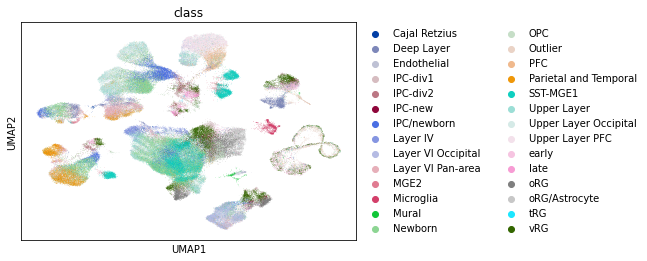

In [68]:
bhaduri = an.read_h5ad('../data/bhaduri/primary_T.h5ad')
bhaduri_labels = pd.read_csv('../data/bhaduri/primary_labels_clean.csv')

bhaduri = bhaduri[bhaduri_labels['cell'].values, :]
bhaduri.obs = bhaduri.obs.reset_index() # Since we selected human_labels['cell']
bhaduri.obs['class'] = bhaduri_labels['categorical_Subtype']

# Calculate PCA for UMAP
sc.tl.pca(bhaduri, svd_solver='arpack')

# Neighborhood embedding + umap
sc.pp.neighbors(bhaduri, n_pcs=50)
sc.tl.umap(bhaduri)



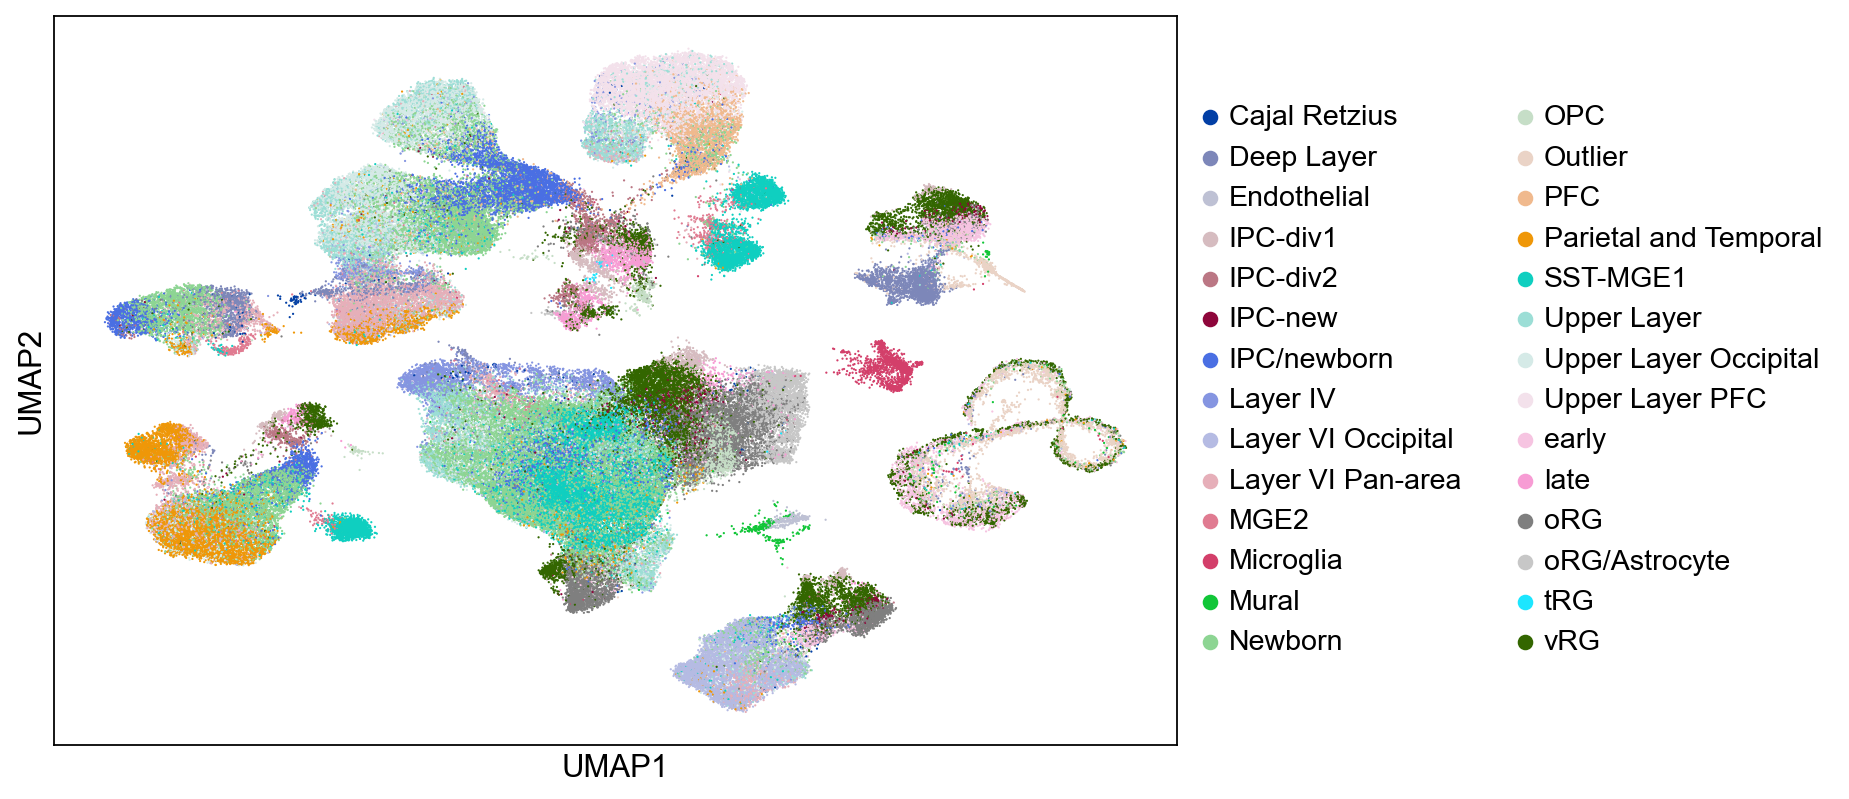

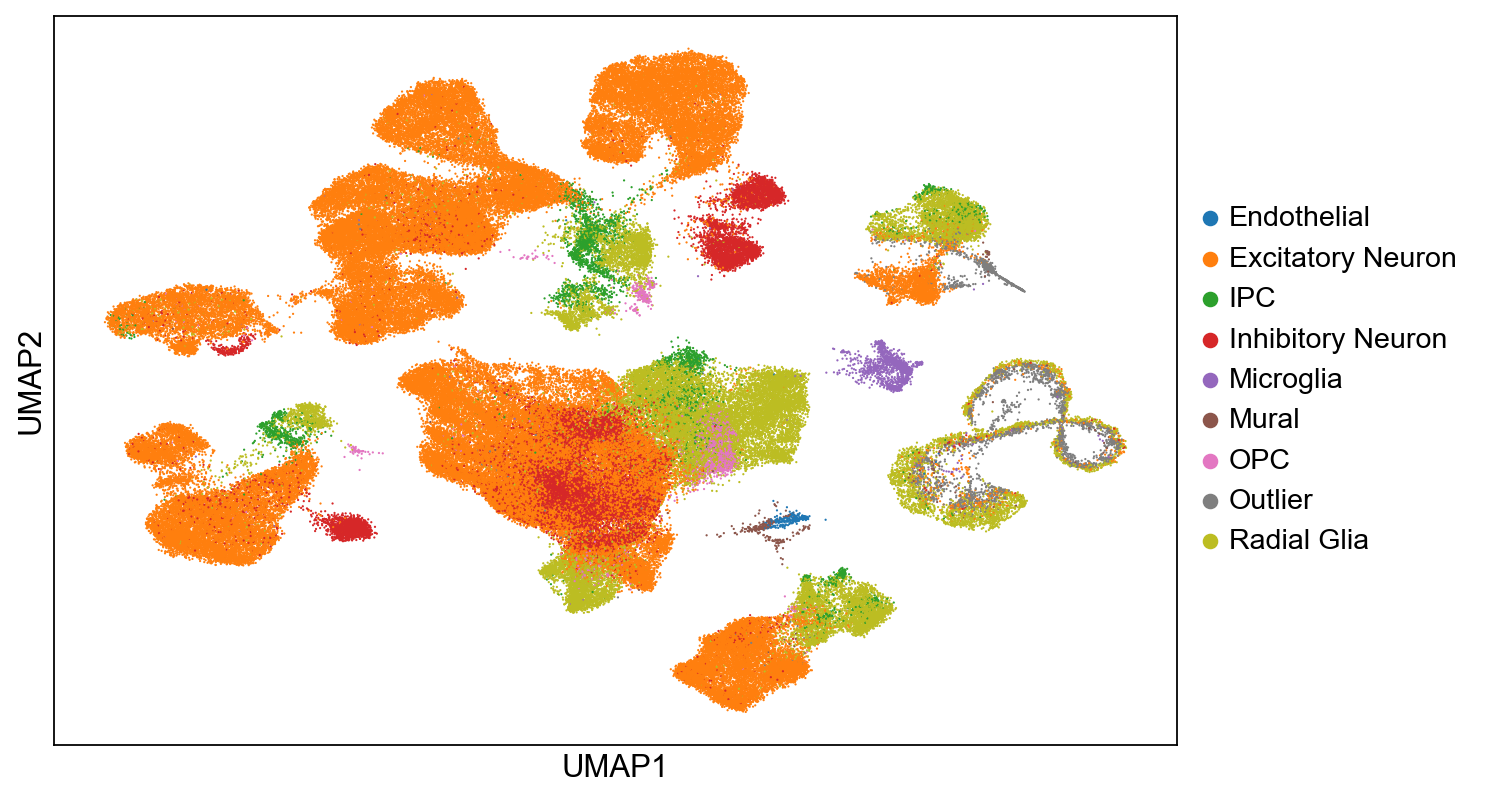

In [169]:
# bhaduri.obs['main_type'] = bhaduri_labels['Type']


# # Visualization
sc.pl.umap(bhaduri, color='class', save='_bhaduri_cortical.pdf', title='', size=4)
sc.pl.umap(bhaduri, color='main_type', save='_bhaduri_shallowclass.pdf', title='', size=4)

### Dental dataset visualization

In [82]:
dental = an.read_h5ad('../data/dental/human_dental_T.h5ad')
dental_labels = pd.read_csv('../data/dental/labels_raw.tsv', sep='\t')

dental.obs['class'] = dental_labels['cell_type']

# Calculate PCA for UMAP
sc.tl.pca(dental, svd_solver='arpack')

# Neighborhood embedding + umap
sc.pp.neighbors(dental, n_pcs=50)
sc.tl.umap(dental)

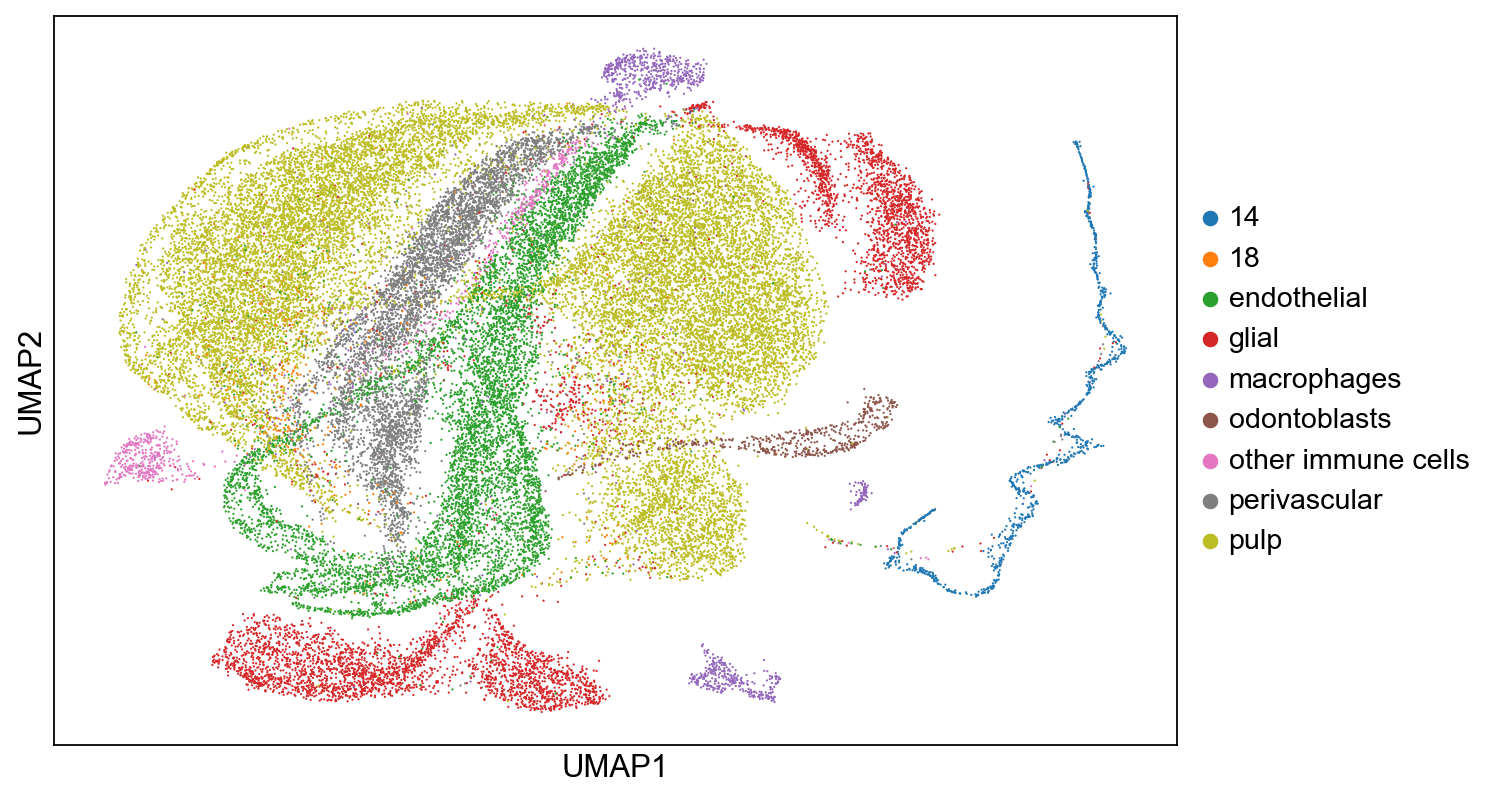

In [168]:
dental.obs = dental.obs.reset_index(drop=True)
dental.obs['class'] = dental_labels['cell_type']
sc.pl.umap(dental, color='class', save='_dental_class.pdf', title='', size=4)

### Retina dataset visualization

In [102]:
retina = an.read_h5ad('../data/retina/retina_T.h5ad')
retina.obs = retina.obs.reset_index(drop=True)

retina_labels = pd.read_csv('../data/retina/retina_labels_numeric.csv')
retina = retina[retina_labels['cell'].values, :]
retina.obs = retina.obs.reset_index(drop=True)

retina.obs['class'] = retina_labels['CellType']

# Calculate PCA for UMAP
sc.tl.pca(retina, svd_solver='arpack')

# Neighborhood embedding + umap
sc.pp.neighbors(retina, n_pcs=50)
sc.tl.umap(retina)

/Users/julian/miniconda3/envs/sims/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/julian/miniconda3/envs/sims/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/julian/miniconda3/envs/sims/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


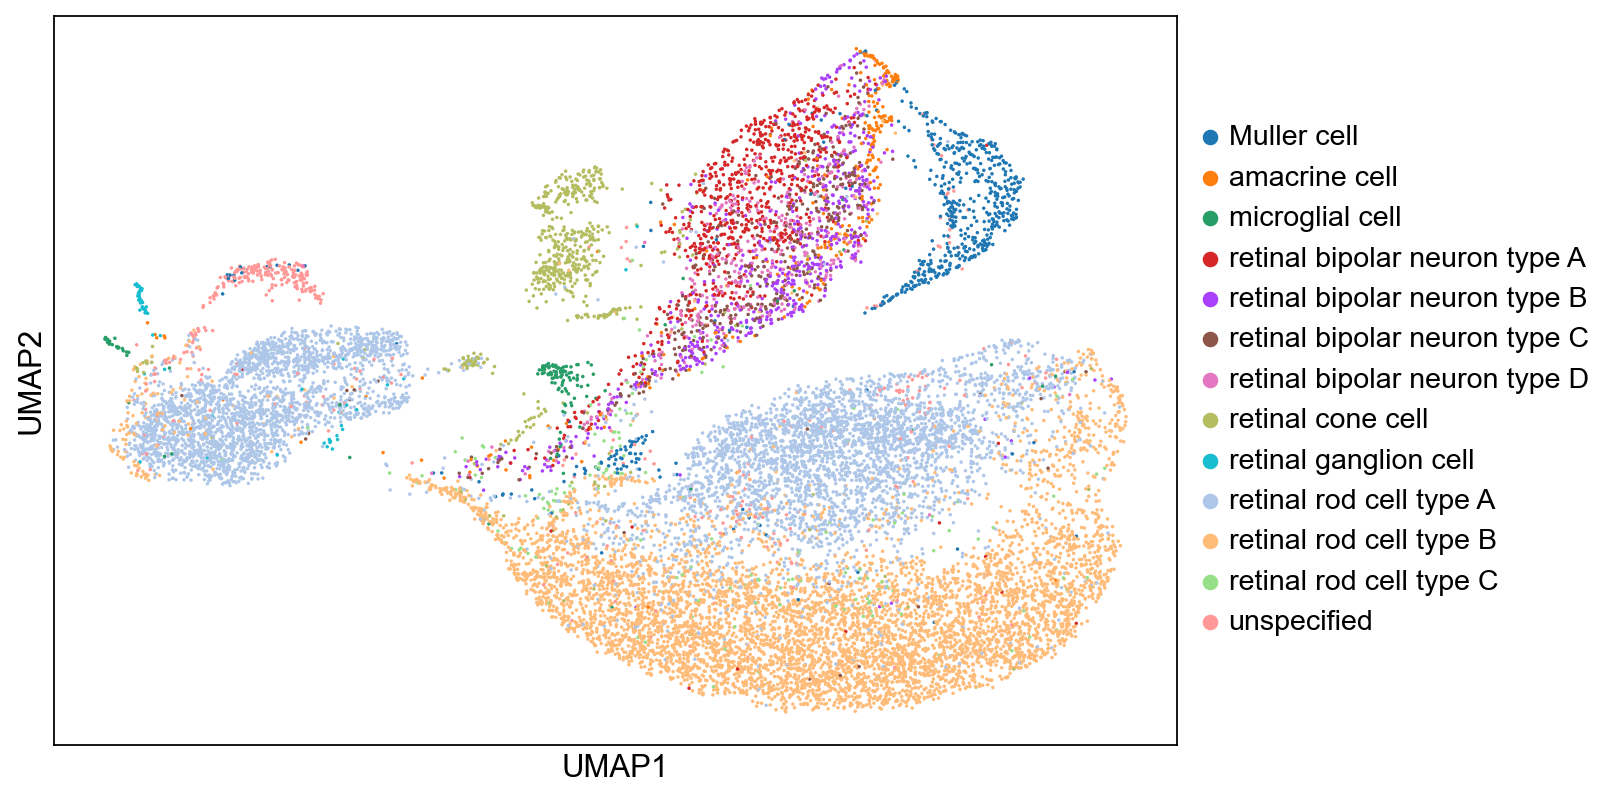

In [176]:

sc.pl.umap(retina, color='class', save='_retina_class.pdf', title='', size=10)

In [119]:
import plotly.graph_objects as go


vals = bhaduri_labels['categorical_Subtype'].value_counts()

fig = go.Figure(
    data=[
        go.Bar(x=vals.index, y=vals.values)
    ],
    layout=go.Layout(
        font_family='Serif',
        title='Distribution of Labels in UCSF Human Cortical Dataset'
    )
)


fig.write_image('../../ms-thesis/images/label_distributions/bhaduri_distribution.pdf')